In [26]:
# Import libraries

# Basic
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFECV, SelectKBest


# My own cleaning libraryb
import cleaning_tools as ct
import tools

# For reloading my tools, while working on them
from importlib import reload

import warnings
warnings.filterwarnings('ignore')

seed = 42

In [27]:
# Load Training Data
data_all = tools.load_data('../data/train.csv')
y = data_all[['SalePrice']].copy()
X = data_all.drop('SalePrice', axis=1)
X.drop(['Id', 'PID'], axis=1, inplace=True)
X = ct.map_to_number(X)


num_cols = [c for c in X.columns if X[c].dtype in [np.int64, np.float64]]
X_nums = X[num_cols].copy()

imputer = Imputer(strategy='median').fit(X_nums)
X_nums = imputer.transform(X_nums)

scaler = StandardScaler().fit(X_nums)
X_pp = scaler.transform(X_nums)

X_train, X_test, y_train, y_test = train_test_split(X_pp, y, test_size=0.2, random_state=seed)

In [43]:
LR = LinearRegression()
cv_scores = cross_val_score(LR, X_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[  7.17586463e-01   8.75208691e-01   8.25169546e-01   8.40728262e-01
   8.54334134e-01   8.63321639e-01   8.35285096e-01  -5.33114644e+18
   3.27014723e-01   8.26915649e-01]
-5.3311464363e+17


best alpha :  631.658291457


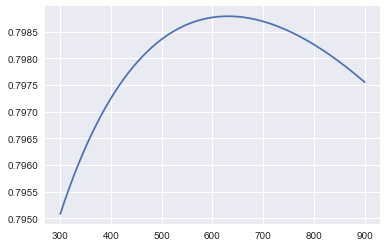

In [50]:
scores = []
alpha = np.linspace(300, 900, num=200)
for a in alpha:
    R = Ridge(alpha=a)
    cvs = cross_val_score(R, X_train, y_train, cv=3)
    scores.append(cvs.mean())

plt.plot(alpha, scores)
print('best alpha : ', alpha[scores.index(max(scores))])

In [53]:
R = Ridge(alpha=631)
R.fit(X_train, y_train)
print(R.score(X_train, y_train))
print(R.score(X_test, y_test))

0.840690134686
0.872891185329


In [57]:
data_test = tools.load_data('../data/test.csv')
ids = data_test[['Id']].copy()
X_final = data_test.drop('Id', axis=1).copy()
X_final = ct.map_to_number(X_final)
X_final = X_final[num_cols]
X_final = imputer.transform(X_final)
X_final = scaler.transform(X_final)
y_final = pd.DataFrame(R.predict(X_final), columns=['SalePrice'])

final_df = pd.concat([ids, y_final], axis=1)
final_df.to_csv('nums_cols_only.csv', index=False)